## Работа со слоями. Модель автоэнкодера. Резидуальные (остаточные) нейронные сети

Задание:

1. Для любого известного набора данных построить модель автоэнкодера с раздельными энкодером и декодером
2. Для используемых данных подобрать оптимальный размер латентного представления (минимальный размер с приемлемым качеством декодирования)
3. Сгенерировать с помощью декодера объекты из случайного / или произвольно модифицированного латентного представления/

In [2]:
import numpy as np
from keras.datasets.mnist import load_data
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Reshape, UpSampling2D, Concatenate
import matplotlib.pyplot as plt

In [3]:
(xtrain, _),(xtest, _) = load_data()
xtrain_n, xtest_n = xtrain / 255.0, xtest / 255.0
xtrain.shape

(60000, 28, 28)

In [4]:
encodedSize = 32
inp = Input( shape = (28,28) )
flat = Flatten()(inp)
h1 = Dense( units = 128, activation = "relu" )( flat )
h2 = Dense( units = 64, activation = "relu" )( h1 )

lat = Dense( units = encodedSize, activation = "relu" )( h2 )

h3 = Dense( units = 64, activation = "relu" )( lat )
h4 = Dense( units = 128, activation = "relu" )( h3 )
h5 = Dense( units = 784, activation = "sigmoid" )( h4 )
out = Reshape((28,28))(h5)

autoEnc1 = Model( inp, out )

autoEnc1.compile( optimizer = "adam", loss = "mse" )
autoEnc1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
autoEnc1.fit( xtrain_n, xtrain_n, batch_size = 100, epochs = 20, validation_split = 0.2 )

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0771 - val_loss: 0.0276
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0255 - val_loss: 0.0209
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0199 - val_loss: 0.0176
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0171 - val_loss: 0.0159
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0156 - val_loss: 0.0149
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0144 - val_loss: 0.0138
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0136 - val_loss: 0.0132
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0128 - val_loss: 0.0125
Epoch 9/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0121 - val_loss: 0.0118
Epoch 10/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 11/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 12/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [6]:
testOut = autoEnc1.predict( xtest_n )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


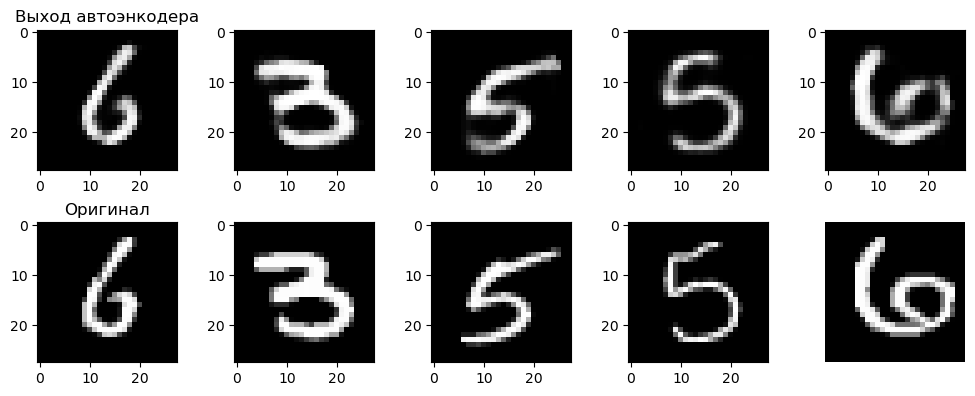

In [7]:
imgInRow = 5
imgOffset = 50

fig, ax = plt.subplots( 2, imgInRow, figsize = (10,4) )
for imgInd in range(imgInRow):
    ax[0, imgInd].imshow( testOut[imgInd + imgOffset], cmap = "gray" )
    ax[0, imgInd]
    ax[0,0].set_title( "Выход автоэнкодера" )
    ax[1, imgInd].imshow( xtest[imgInd + imgOffset], cmap = "gray" )
    ax[1,0].set_title( "Оригинал" )
plt.axis("off")
plt.tight_layout()

In [8]:
encInp = Input( shape = (28,28) )
flat = Flatten()(encInp)
h1 = Dense( units = 128, activation = "relu" )( flat )
h2 = Dense( units = 64, activation = "relu" )( h1 )
lat = Dense( units = encodedSize, activation = "relu" )( h2 )

decInp = Input( shape = (encodedSize,) )
h3 = Dense( units = 64, activation = "relu" )( decInp )
h4 = Dense( units = 128, activation = "relu" )( h3 )
h5 = Dense( units = 784, activation = "sigmoid" )( h4 )
decOut = Reshape((28,28))(h5)

encoder = Model( encInp, lat )
decoder = Model( decInp, decOut )

autoEncoder = Model( encInp, decoder( encoder(encInp) ) )

autoEncoder.compile( optimizer = "adam", loss = "mse" )
autoEncoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_2 (Functional)       │ (None, 28, 28)         │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
autoEncoder.fit( xtrain_n, xtrain_n, batch_size = 100, epochs = 20, validation_split = 0.2 )

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0743 - val_loss: 0.0265
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0245 - val_loss: 0.0202
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0192 - val_loss: 0.0171
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0166 - val_loss: 0.0155
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0149 - val_loss: 0.0142
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0137 - val_loss: 0.0133
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0130 - val_loss: 0.0127
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0124 - val_loss: 0.0120
Epoch 9/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 10/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 11/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 12/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [10]:
enc2Out = autoEncoder.predict( xtest_n )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


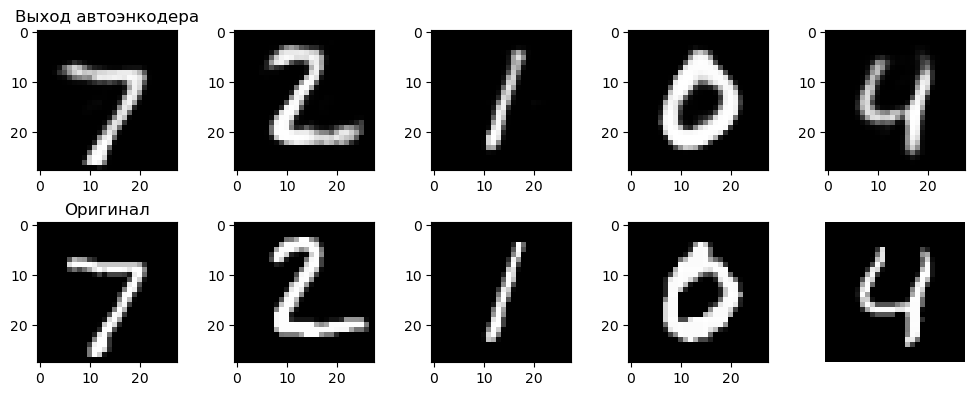

In [11]:
imgInRow = 5
imgOffset = 0

fig, ax = plt.subplots( 2, imgInRow, figsize = (10,4) )
for imgInd in range(imgInRow):
    ax[0, imgInd].imshow( enc2Out[imgInd + imgOffset], cmap = "gray" )
    ax[0, imgInd]
    ax[0,0].set_title( "Выход автоэнкодера" )
    ax[1, imgInd].imshow( xtest[imgInd + imgOffset], cmap = "gray" )
    ax[1,0].set_title( "Оригинал" )
plt.axis("off")
plt.tight_layout()

In [12]:
testIndex = 0

encoderOut = encoder.predict( xtest_n[imgOffset].reshape(1,28,28) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [13]:
encoderOut

array([[ 0.       ,  6.3669353, 10.690196 ,  9.222602 , 13.3294735,
        10.137905 ,  7.027858 , 11.692081 , 12.583175 , 11.625152 ,
         9.657737 ,  4.1020937,  0.       ,  7.4495554, 10.328013 ,
         0.       , 14.238937 , 16.543032 ,  6.611456 ,  0.9948982,
         0.       ,  6.2160854, 10.583363 ,  4.6041217,  8.147525 ,
         8.433166 , 15.033697 ,  9.261511 ,  4.78034  ,  9.279969 ,
        11.041863 ,  0.       ]], dtype=float32)

In [14]:
arbitrInput  = np.array([[ 3.8352532,  0.       ,  6.2069798, 11.737291 ,  0.       ,
        10.890174 ,  6.0942645,  2.383709 ,  0.       ,  6.407731 ,
         5.136534 ,  4.273223 ,  9.427326 ,  4.792769 , 11.562129 ,
         7.1339393,  7.179337 ,  4.6225333,  7.087699 , 10.907908 ,
        12.946022 ,  6.2620683,  5.80655  ,  6.0338287,  9.596424 ,
        12.498168 , 12.994666 ,  0.       ,  1.9514097, 12.811241 ,
         5.6754856,  5.6205015]])

In [15]:
#encoderOut = encoder.predict( xtest_n[imgOffset].reshape(1,28,28) )
decoderOut = decoder.predict( arbitrInput )[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


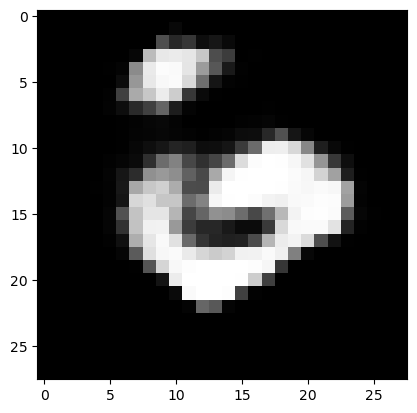

In [16]:
plt.imshow( decoderOut, cmap = "gray" )

In [17]:
encInput = Input( shape = (28, 28, 1) )
enc1 = Conv2D( filters = 32, kernel_size = (3,3), padding = "same" )(encInput)
enc2 = MaxPooling2D( pool_size = (2,2), padding = "same" )(enc1) #28 / 2 = 14
enc3 = Conv2D( filters = 16, kernel_size = (3,3), padding = "same" )(enc2)
enc4 = MaxPooling2D( pool_size = (2,2), padding = "same" )(enc3) #14 / 2 = 7

decInput = Input( shape = (7, 7, 16) )
dec1 = Conv2D( filters = 16, kernel_size = (3,3), padding = "same" )(decInput)
dec2 = UpSampling2D( size = (2,2) )(dec1) # 7* 2 = 14
dec3 = Conv2D( filters = 32, kernel_size = (3,3), padding = "same" )(dec2)
dec4 = UpSampling2D( size = (2,2) )(dec3) # 14 * 2 = 28
dec5 = Conv2D( filters = 1, kernel_size = (3,3), padding = "same", activation = "sigmoid" )(dec4)

convEnc = Model( encInput, enc4 )
convDec = Model( decInput, dec5 )

conAutoEnc = Model( encInput, convDec( convEnc( encInput ) ) )
conAutoEnc.compile( optimizer = "SGD", loss = "mse" )
conAutoEnc.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_4 (Functional)       │ (None, 7, 7, 16)       │         4,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_5 (Functional)       │ (None, 28, 28, 1)      │         7,249 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
conAutoEnc.fit( xtrain_n, xtrain_n, epochs = 10, batch_size = 100, validation_split = 0.2 )

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - loss: 0.1473 - val_loss: 0.0485
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0436 - val_loss: 0.0358
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 0.0338 - val_loss: 0.0308
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 0.0296 - val_loss: 0.0280
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.0270 - val_loss: 0.0260
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - loss: 0.0252 - val_loss: 0.0244
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - loss: 0.0237 - val_loss: 0.0230
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0223 - val_loss: 0.0218
Epoch 9/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0212 - val_loss: 0.0208
Epoch 10/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0201 - val_loss: 0.0199


In [19]:
xtestNoize = xtest_n + 0.3 * np.random.normal(loc = 0.0, scale = 1.0, size = xtest_n.shape)
xtestNoize = np.clip( xtestNoize, 0.0, 1.0 )

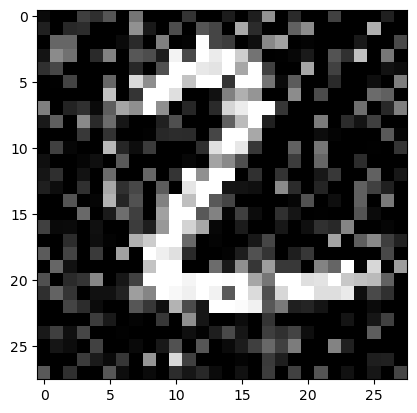

In [20]:
plt.imshow( xtestNoize[1], cmap = "gray" )
plt.show()

In [21]:
enc2Out = conAutoEnc.predict( xtestNoize )

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


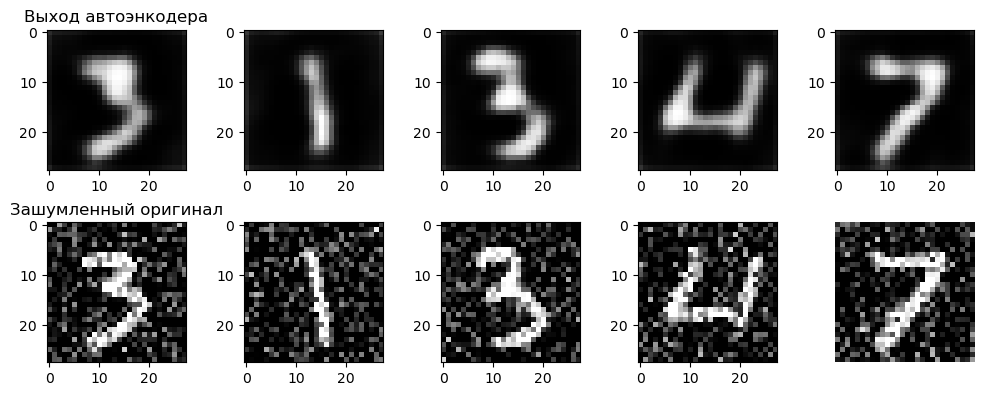

In [22]:
imgInRow = 5
imgOffset = 30

fig, ax = plt.subplots( 2, imgInRow, figsize = (10,4) )
for imgInd in range(imgInRow):
    ax[0, imgInd].imshow( enc2Out[imgInd + imgOffset], cmap = "gray" )
    ax[0, imgInd]
    ax[0,0].set_title( "Выход автоэнкодера" )
    ax[1, imgInd].imshow( xtestNoize[imgInd + imgOffset], cmap = "gray" )
    ax[1,0].set_title( "Зашумленный оригинал" )
plt.axis("off")
plt.tight_layout()

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [24]:
irisDs = load_iris()
x = irisDs["data"]
y = irisDs["target"]

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split( x, y, train_size = 0.8 )
x = Input( shape = (x.shape[1],) )
h1 = Dense( units = 4, activation = "relu" )(x)

h1x = Concatenate()([x,h1]) # на слой h2 подаем не только выход h1, но и пробрасываем входы сети x

h2 = Dense( units = 8, activation = "relu" )(h1x)
resOut = Dense( units = len(np.unique(y)), activation = "softmax" )(h2)

resModel = Model( x, resOut )
resModel.compile( loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["sparse_categorical_accuracy"] )
hist = resModel.fit( xtrain, ytrain, batch_size = 10, epochs = 50 )

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4602 - sparse_categorical_accuracy: 0.2980  
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5250 - sparse_categorical_accuracy: 0.3867
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1420 - sparse_categorical_accuracy: 0.3241 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6860 - sparse_categorical_accuracy: 0.3049 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4616 - sparse_categorical_accuracy: 0.2676 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0483 - sparse_categorical_accuracy: 0.5300
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0159 - sparse_categorical_accuracy: 0.6613
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9296 - sparse_categorical_accuracy: 0.6779
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8606 - sparse_categorical_accuracy: 0.6870 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7803 -

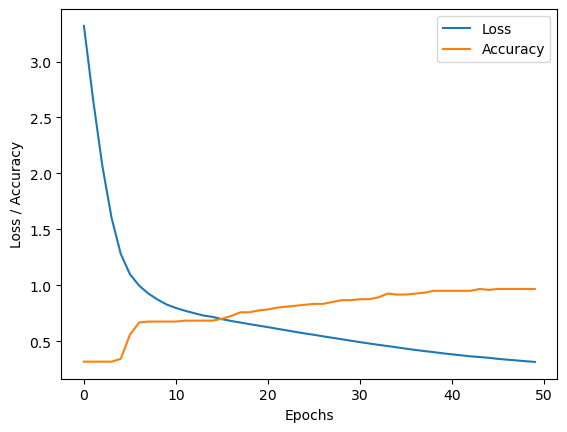

In [26]:
plt.plot( hist.history["loss"], label = "Loss" )
plt.plot( hist.history["sparse_categorical_accuracy"], label = "Accuracy" )
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.show()

In [27]:
from keras.datasets.fashion_mnist import load_data as load_fashion #load_data у нас уже есть для обычного mnist
from keras.layers import Rescaling #рассмотрим нормирование "на лету" в виде служебного слоя в модели

In [28]:
(fxtrain, fytrain), (fxtest, fytest) = load_fashion()
fxtrain_n, fxtest_n = fxtrain / 255.0, fxtest / 255.0
fconInput = Input( shape = (28,28,1) )
#fconScale = Rescaling(1.0 / 255.0)(fconInput) #это притормаживает работу. Если оставить этот слой, то данные не нужно нормировать. Используем напрямую fxtrain и fxtest
fconCon1 = Conv2D( filters = 32, kernel_size = (3,3), padding = "same" )(fconInput) #сохраняем размер тензора как у входного !!!

fconConcat = Concatenate()([fconInput, fconCon1])

fconCon2 = Conv2D( filters = 64, kernel_size = (3,3) )(fconConcat)
fconPool2 = MaxPooling2D( pool_size = (2,2) )(fconCon2)

fconCon3 = Conv2D( filters = 128, kernel_size = (3,3) )(fconPool2)
fconPool3 = MaxPooling2D( pool_size = (2,2) )(fconCon3)
fconFlat = Flatten()(fconPool3)
fconDen1 = Dense( units = 256, activation = "relu" )(fconFlat)
fconOut = Dense( units = len(np.unique(fytrain)), activation = "sigmoid")(fconDen1)

dconModel = Model( fconInput, fconOut )
dconModel.compile( loss = "sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["sparse_categorical_accuracy"] )

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [29]:
# интересный момент - это выход слоя Concatenate, состоящий из 33 каналов "изображения" 28х28 (т.е. результат 32 фильтров + 1 входной)
dconModel.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 28,    │        320 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 28, 28,    │          0 │ input_layer_6[0]… │
│ (Concatenate)       │ 33)               │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 26, 26,    │     19,072 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 13, 13,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 11, 11,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 5, 5, 128) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 3200)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 256)       │    819,456 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 10)        │      2,570 │ dense_15[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 915,274 (3.49 MB)

 Trainable params: 915,274 (3.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - loss: 1.3236 - sparse_categorical_accuracy: 0.5775 - val_loss: 0.6114 - val_sparse_categorical_accuracy: 0.7804
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - loss: 0.6036 - sparse_categorical_accuracy: 0.7761 - val_loss: 0.5198 - val_sparse_categorical_accuracy: 0.8181
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - loss: 0.5194 - sparse_categorical_accuracy: 0.8106 - val_loss: 0.5086 - val_sparse_categorical_accuracy: 0.8204
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - loss: 0.4741 - sparse_categorical_accuracy: 0.8257 - val_loss: 0.4440 - val_sparse_categorical_accuracy: 0.8413
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - loss: 0.4393 - sparse_categorical_accuracy: 0.8437 - val_loss: 0.4129 - val_sparse_categorical_accuracy: 0.8506
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 38s 78ms/step - loss: 0.4031 - sparse_categorical_accuracy: 0.8549 - val_loss: 0.4236 - val_sparse_categorical_accuracy:

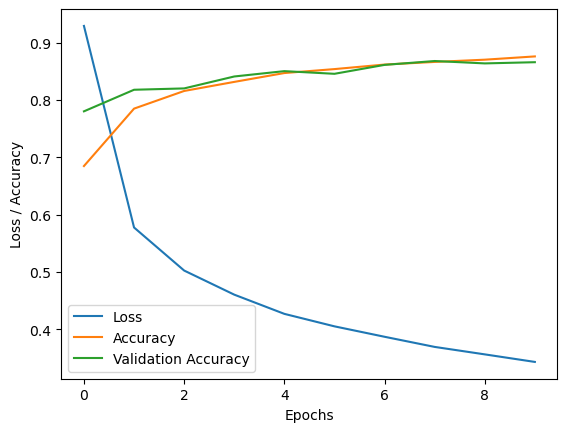

In [30]:
hist = dconModel.fit( fxtrain_n, fytrain, batch_size = 100, epochs = 10, validation_split = 0.2 )

plt.plot( hist.history["loss"], label = "Loss" )
plt.plot( hist.history["sparse_categorical_accuracy"], label = "Accuracy" )
plt.plot( hist.history["val_sparse_categorical_accuracy"], label = "Validation Accuracy" )
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.show()

In [31]:
dconModel.evaluate( fxtest_n, fytest )

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3930 - sparse_categorical_accuracy: 0.8610


[0.3887248635292053, 0.8619999885559082]